<a href="https://colab.research.google.com/github/pablex72/CNN-deep-learning/blob/main/change_detection_images_tiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 34.9 MB/s eta 0:00:00


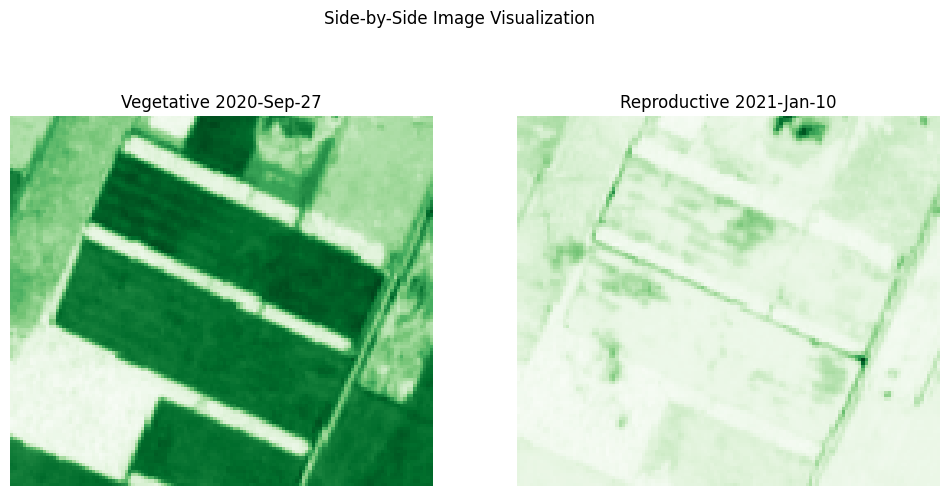

In [2]:
import rasterio
import matplotlib.pyplot as plt

# Open the first TIFF image file
with rasterio.open('/content/Sentinel-2-vege-20-09-27.tif') as src1:
    # Read the first image data
    image_data1 = src1.read(1)  # Assuming it's a single-band image, change index if necessary

# Open the second TIFF image file
with rasterio.open('/content/Sentinel-2-repro-21-01-10.tif') as src2:
    # Read the second image data
    image_data2 = src2.read(1)  # Assuming it's a single-band image, change index if necessary

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image in the first subplot
axes[0].imshow(image_data1, cmap='Greens')  # You can change the colormap as needed
axes[0].set_title('Vegetative 2020-Sep-27')
axes[0].axis('off')  # Turn off the axis for the first subplot

# Display the second image in the second subplot
axes[1].imshow(image_data2, cmap='Greens')  # You can change the colormap as needed
axes[1].set_title('Reproductive 2021-Jan-10')
axes[1].axis('off')  # Turn off the axis for the second subplot

# Add a title for the entire figure
plt.suptitle('Side-by-Side Image Visualization')

# Show the subplots
plt.show()


<ipython-input-7-bf05d5279252>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlBu', 2)  # Red for change (1), blue for no change (0)


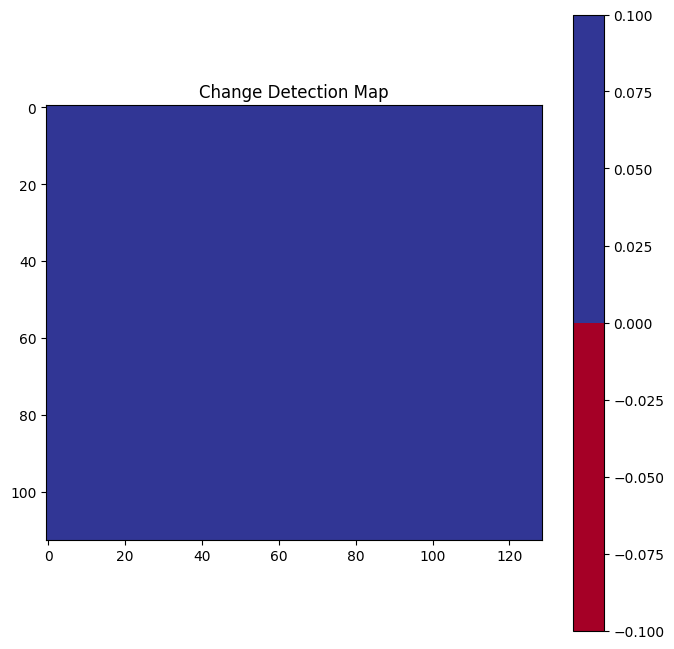

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the first TIFF image file
with rasterio.open('/content/Sentinel-2-vege-20-09-27.tif') as src1:
    # Read the first image data
    image_data1 = src1.read(1)  # Assuming it's a single-band image, change index if necessary

# Open the second TIFF image file
with rasterio.open('/content/Sentinel-2-repro-21-01-10.tif') as src2:
    # Read the second image data
    image_data2 = src2.read(1)  # Assuming it's a single-band image, change index if necessary

# Calculate the absolute difference between the two images
change_map = np.abs(image_data2 - image_data1)

# Set a threshold to identify significant changes (you can adjust this threshold)
threshold = 10000  # Adjust as needed
change_mask = change_map > threshold

# Create a binary change mask (1 for change, 0 for no change)
change_mask = change_mask.astype(np.uint8)

# Create a color map for visualizing the change mask
cmap = plt.cm.get_cmap('RdYlBu', 2)  # Red for change (1), blue for no change (0)

# Display the change mask
plt.figure(figsize=(8, 8))
plt.imshow(change_mask, cmap=cmap)
plt.title('Change Detection Map')
plt.colorbar()
plt.show()


*Random Forest

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Open the first TIFF image file
with rasterio.open('/content/Sentinel-2-vege-20-09-27.tif') as src1:
    # Read the first image data
    image_data1 = src1.read()  # Read all bands

# Open the second TIFF image file
with rasterio.open('/content/Sentinel-2-repro-21-01-10.tif') as src2:
    # Read the second image data
    image_data2 = src2.read()  # Read all bands

# Calculate the absolute difference between the two images
change_map = np.abs(image_data2 - image_data1)

# Set a threshold to identify significant changes (you can adjust this threshold)
threshold = 10  # Adjust as needed
change_mask = change_map > threshold

# Create a binary change mask (1 for change, 0 for no change)
change_mask = change_mask.astype(np.uint8)

# Open the corresponding ground truth change mask (if available)
# This is optional and can be used for training and evaluation
with rasterio.open('/path/to/ground_truth_change_mask.tif') as ground_truth:
    ground_truth_mask = ground_truth.read(1)  # Assuming it's a single-band image, change index if necessary

# Flatten the data for training the Random Forest classifier
X = change_map.reshape(-1, 1)  # Input data (change map values)
y = ground_truth_mask.flatten()  # Ground truth labels (if available)

# Split the data into training and testing sets (useful if you have ground truth data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data (if ground truth is available)
if len(np.unique(y_train)) > 1:
    clf.fit(X_train, y_train)

    # Predict change based on the trained classifier
    predicted_change = clf.predict(X_test)

    # Calculate accuracy (if ground truth is available)
    accuracy = accuracy_score(y_test, predicted_change)
    print(f'Accuracy: {accuracy:.2f}')

# Use the trained classifier to classify all pixels in the change map
predicted_change_map = clf.predict(X).reshape(change_map.shape)

# Create a color map for visualizing the change map
cmap = plt.cm.get_cmap('RdYlBu', 2)  # Red for change (1), blue for no change (0)

# Display the change map
plt.figure(figsize=(8, 8))
plt.imshow(predicted_change_map, cmap=cmap)
plt.title('Change Detection Map (Random Forest)')
plt.colorbar()
plt.show()


RasterioIOError: ignored

TypeError: ignored

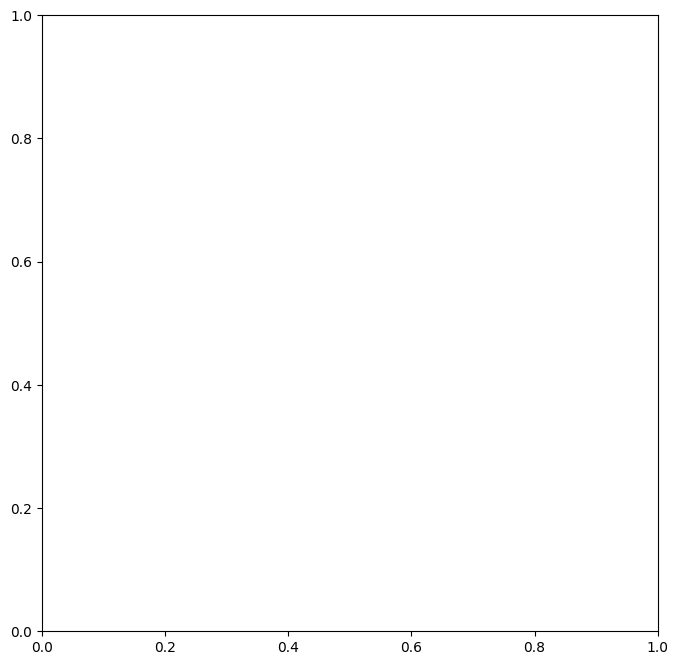

In [13]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the two TIFF image files (replace with your file paths)
with rasterio.open('/content/Sentinel-2-vege-20-09-27.tif') as src1, rasterio.open('/content/Sentinel-2-repro-21-01-10.tif') as src2:
    # Read the image data
    image1_data = src1.read(1)
    image2_data = src2.read(1)

# Calculate NDVI for each image
def calculate_ndvi(image):
    # Bands 4 and 5 are typically used for NDVI
    nir_band = image[4].astype(float)
    red_band = image[3].astype(float)
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

ndvi1 = calculate_ndvi(image1_data)
ndvi2 = calculate_ndvi(image2_data)

# Calculate the difference in NDVI between the two images
ndvi_difference = ndvi2 - ndvi1

# Set a threshold to classify change
threshold = 0.1  # You can adjust this threshold as needed

# Create a binary change mask
change_mask = np.where(ndvi_difference > threshold, 1, 0)

# Ensure that the change mask has the same shape as the original images
# If not, you can use image1_data or image2_data to extract the dimensions
# and resize the change_mask accordingly.

# Display the change mask
plt.figure(figsize=(12, 8))
plt.imshow(change_mask, cmap='binary', interpolation='none')
plt.title('Change Detection')
plt.colorbar()
plt.show()


ValueError: ignored

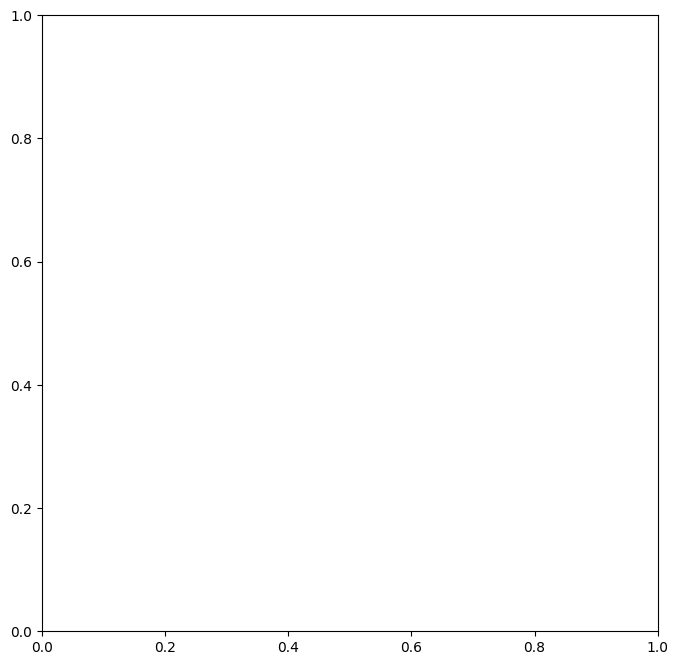

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the two TIFF image files (replace with your file paths)
with rasterio.open('/content/Sentinel-2-vege-20-09-27.tif') as src1, rasterio.open('/content/Sentinel-2-repro-21-01-10.tif') as src2:
    # Read the image data
    image1_data = src1.read(1)
    image2_data = src2.read(1)

# Calculate NDVI for each image
def calculate_ndvi(image):
    # Bands 4 and 5 are typically used for NDVI
    nir_band = image[4].astype(float)
    red_band = image[3].astype(float)
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

ndvi1 = calculate_ndvi(image1_data)
ndvi2 = calculate_ndvi(image2_data)

# Calculate the difference in NDVI between the two images
ndvi_difference = ndvi2 - ndvi1

# Set a threshold to classify change
threshold = 0.1  # You can adjust this threshold as needed

# Create a binary change mask
change_mask = np.where(ndvi_difference > threshold, 1, 0)

# Get the extent and origin of the images
extent = src1.bounds
origin = src1.transform * (0, 0)

# Display the change mask
plt.figure(figsize=(12, 8))
plt.imshow(change_mask, cmap='binary', extent=extent, origin=origin, interpolation='none')
plt.title('Change Detection')
plt.colorbar()
plt.show()


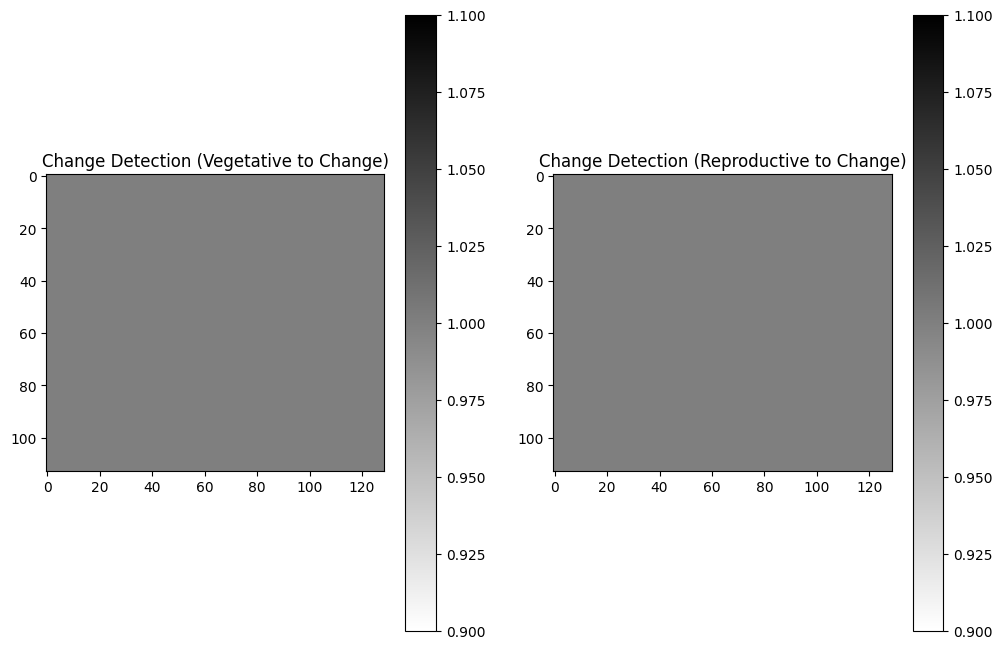

In [18]:
import numpy as np
import rasterio
from sklearn.ensemble import RandomForestClassifier

# Load your NDVI images (replace with your file paths)
ndvi_vegetative = rasterio.open('/content/Sentinel-2-vege-20-09-27.tif').read(1)
ndvi_reproductive = rasterio.open('/content/Sentinel-2-repro-21-01-10.tif').read(1)

# Load training data (replace with your labeled training samples)
# In this example, we assume you have a list of (NDVI, label) tuples


# Example training data for change detection
# Each tuple contains (NDVI value, label)
training_data = [
    (0.12, 0),  # NDVI value for no change (e.g., water or barren land)
    (0.28, 0),  # NDVI value for no change (e.g., urban areas)
    (0.42, 1),  # NDVI value for change (e.g., from vegetative to non-vegetative)
    (0.65, 1),  # NDVI value for change (e.g., from non-vegetative to vegetative)
    # Add more training data points as needed based on your area and changes of interest
]


# Prepare the data for training
X = np.array([sample[0] for sample in training_data])  # NDVI values
y = np.array([sample[1] for sample in training_data])  # Labels

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X.reshape(-1, 1), y)

# Load the entire NDVI images
ndvi_vegetative_full = rasterio.open('/content/Sentinel-2-vege-20-09-27.tif').read(1)
ndvi_reproductive_full = rasterio.open('/content/Sentinel-2-repro-21-01-10.tif').read(1)

# Prepare the data for prediction
X_vegetative = ndvi_vegetative_full.reshape(-1, 1)
X_reproductive = ndvi_reproductive_full.reshape(-1, 1)

# Predict land cover change using the trained classifier
change_mask_vegetative = clf.predict(X_vegetative)
change_mask_reproductive = clf.predict(X_reproductive)

# Reshape the change masks to match the original image dimensions
change_mask_vegetative = change_mask_vegetative.reshape(ndvi_vegetative_full.shape)
change_mask_reproductive = change_mask_reproductive.reshape(ndvi_reproductive_full.shape)

# Visualize the change masks (you can use any visualization library you prefer)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(change_mask_vegetative, cmap='binary', interpolation='none')
plt.title('Change Detection (Vegetative to Change)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(change_mask_reproductive, cmap='binary', interpolation='none')
plt.title('Change Detection (Reproductive to Change)')
plt.colorbar()

plt.show()
